In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import glob
import pickle as pickle
%matplotlib inline

In [9]:
ls

camera_cal/               example_writeup.pdf         README.md
Camera Calibration.ipynb  harder_challenge_video.mp4  test_images/
challenge_video.mp4       output_images/              writeup_template.md
examples/                 project_video.mp4


Find how many calibration images we have

In [21]:
ls camera_cal | wc -l

20


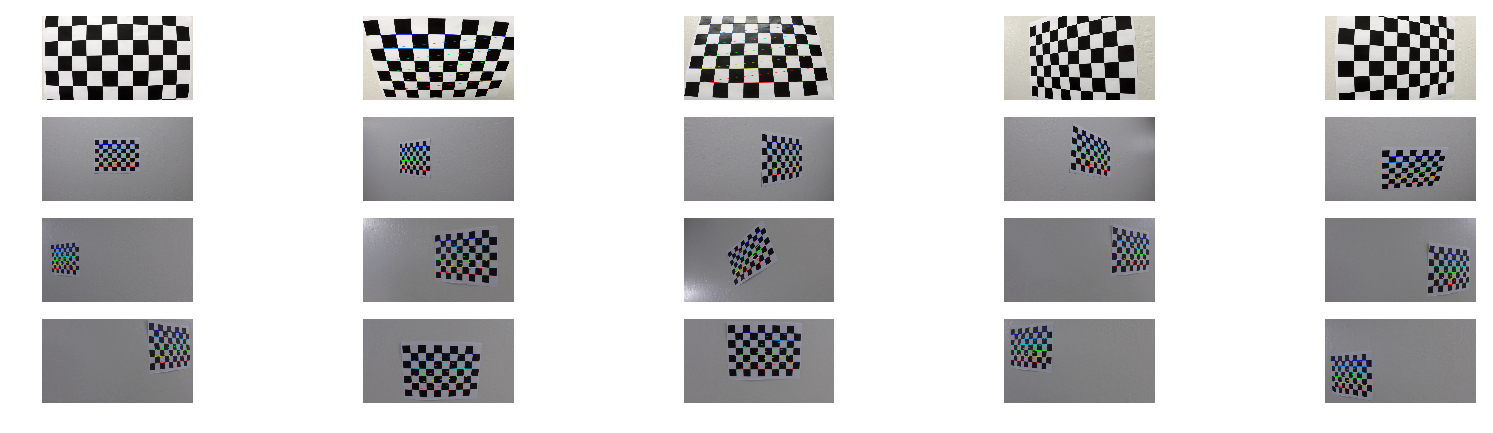

In [18]:
nx = 9
ny = 6

objp = np.zeros((nx * ny, 3), np.float32)
objp[:,:2] = np.mgrid[0: nx, 0: ny].T.reshape(-1, 2)

# create lists to store imagepoints and objectpoints
objpoints = []
imgpoints = []

plt.figure(figsize = (20, 5))
plt.title('calibration')


for i in range(20):
    fname = 'camera_cal/calibration' + str(i+1) + '.jpg'
    img = mpimg.imread(fname)
    
    # grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    plt.subplot(4, 5, i+1)
    # Find corners of chessboard, (we had to grayscale first to find them)
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
    
    if ret == True:
        # draw corners onto the original image
        cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
        
        
        objpoints.append(objp)
        imgpoints.append(corners)
        
        plt.imshow(img)
    else:
        plt.imshow(img)
    
    
    plt.axis('off')
        


In [24]:
# pick the first image to use its size

fname = 'camera_cal/calibration1.jpg'
img = mpimg.imread(fname)
img_size = (img.shape[1], img.shape[0])
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size, None, None)

In [25]:
print('mtx: ', mtx.shape)
print('dist: ', dist.shape)

mtx:  (3, 3)
dist:  (1, 5)


#### Save to mtx and dst to pickle file

In [26]:
data = [mtx, dist]
pickle.dump(data, open("camera_calibration.pkl", "wb"))

Now use `cv2.undistort()` to undistory the images 

In [ ]:
for i in range(20):
    fname = 'camera/cal/calibration' + str(i+1) + '.jpg'